In [1]:
import numpy as np
from numpy import inf
import matplotlib.pyplot as plt
import math
import random

In [2]:
def ant_colony(niter):
    
    file = open("C:\\Users\\Vivek W\\Documents\\Heuristic optimization\\Homework 3\\My code\\ACO\\Berlin52.txt", "r")
    # print(file.readlines())
    # content_list = content.split(",")

    x_coor =np.zeros((1, 52))
    y_coor =np.zeros((1, 52))
    x = []
    y = []

    for line in file:
        row = line.split()
        row[1] = float(row[1])
        row[2] = float(row[2])
        x.append(row[1])  #stored coordinates separately in x and y
        y.append(row[2])

    x_coor = np.array(x)
    y_coor = np.array(y)

    # define parameters
    no_ants = 100
    no_cities = 52
    alpha = 0.85   #pheromone exponent parameter
    beta = 1.7    #heuristic exponent parameter
    Q = 100    #pheromoe reward factor or constant
    rho = 0.6  #evaporation rate
    t0 = (1/1000000)*np.ones((no_cities, no_cities))  #initial pheromone per path, should be 52x52 matrix
    route = np.ones((no_ants, no_cities+1))  # ants in rows and visited cities in columns...gives city number visited by ants in a row
   

    distance = np.zeros((no_cities, no_cities))
    for i in range(0, no_cities - 1):
    #     print(i)
        for j in range(i+1,no_cities):
            distance[i,j] = math.sqrt((x_coor[i]-x_coor[j])**2 + (y_coor[i]-y_coor[j])**2)
            distance[j,i] = distance[i,j]
#     print(distance)
    eta = 1/distance
    eta[eta == inf] = 0
#     print('eta print', eta)
#     random.seed(9)
    prob = np.zeros((no_ants,no_cities))
    # print(prob)
    best_cost_perit = []
    best_route_perit = []
   
    for it in range(niter):
        route[:,0] = 0
        visited_cities = [[-1] * no_cities for i in range(no_ants)]
        cost_ants_optimal_path = [0] * no_ants
        for i in range(no_ants):
            c = 0
        #     for j in range(no_cities-1):   
            while c<=no_cities - 2:
        #         print("ANT:",i)
                curr_city = int(route[i, c])
                if c == 0:
                    route[i, 0] = curr_city
                    visited_cities[i][0] = curr_city
                pher= np.power(t0[curr_city,:],alpha)         #calculating pheromne feature 
                eta_1 = np.power(eta[curr_city,:],beta)
                denom_prob = np.sum(np.multiply(pher,eta_1))
                prob = np.multiply(pher,eta_1)/(denom_prob)
                prob[prob == inf] = 0
                cumulative_prob = np.cumsum(prob)
#     print('cum prob', cumulative_prob)
                found_next_city = False
                r_num = random.uniform(0,1)
                while not found_next_city:
                    cities_cumu_prob = list(np.where(cumulative_prob>r_num)[0])       #finding the next city having probability higher then random(r) 
                    next_cities = np.setdiff1d(cities_cumu_prob, visited_cities[i])
    #                 
                    if len(next_cities) > 0:
                        next_city = next_cities[0]
                        route[i,c+1] = next_city
                        visited_cities[i][c+1] = next_city
                #                 print(c)
                        cost_ants_optimal_path[i] = cost_ants_optimal_path[i] + distance[curr_city, next_city]
                        c=c+1
                        found_next_city = True
                    else:
                        r_num = 0

        
        optimal_routes = np.array(visited_cities)
        # print(optimal_routes) #sequence of cities visited

        optimal_path_posofant = np.argmin(cost_ants_optimal_path) #least cost path travelling ant's index
        min_cost = cost_ants_optimal_path[optimal_path_posofant] #sabse lowest cost mila is iteration ka
        best_cost_perit.append(min_cost) # sare iterations ki min cost store kar rahe 
#         print('min cost per iteration', min_cost)
#         print(best_cost_perit)
        min_cost_route = route[optimal_path_posofant,:] #route of min cost in this iteration
        best_route_perit.append(min_cost_route) #route of min cost of all iterations
#       

        t0 = (1-rho)*t0 # pheromone with evaporation rate
    #     print(t0)
        a=0
        ct = 0
        while a < no_ants:
        #     print('ant',a)
            for ct in range(no_cities-1):
        #         print(a)
                delta_tau = 1/cost_ants_optimal_path[a]
        #         print(delta_tau)
                t0[int(optimal_routes[a,ct])-1,int(optimal_routes[a,ct+1])-1] = t0[int(optimal_routes[a,ct])-1,int(optimal_routes[a,ct+1])-1] + delta_tau   
        #         print(ct)
                ct = ct+1
            a= a+1

    return best_route_perit, best_cost_perit

Route and costs for all 10 runs:
Best route and Cost for Run: 1


<ipython-input-2-33f0f217df7d>:40: RuntimeWarning: divide by zero encountered in true_divide
  eta = 1/distance


[ 0. 45. 23. 24. 25. 26. 27. 50. 28. 49. 15. 29. 30. 36. 37. 38. 39. 42.
 44. 40.  2. 17. 31. 46. 32. 41.  6.  1.  7. 43. 47. 33. 35. 48. 21. 51.
  4. 14.  5.  3.  8.  9. 10. 18. 34. 11. 12. 13. 16. 22. 19. 20.  1.] 14820.200820451333

Best route and Cost for Run: 2
[ 0.  5. 40.  1. 41. 20. 22. 19. 49. 21.  2. 17.  3.  6.  7.  8.  9.  4.
 10. 50. 11. 27. 51. 12. 15. 28. 29. 13. 18. 44. 30. 14. 45. 47. 23. 24.
 25. 26. 16. 31. 32. 35. 38. 39. 33. 34. 36. 42. 37. 43. 46. 48.  1.] 15325.613367334663

Best route and Cost for Run: 3
[ 0. 40. 18. 20.  2. 16. 21. 30. 33. 34. 35. 38. 36. 37. 39.  4. 14. 23.
 41. 31. 48. 42. 43. 32. 44. 24. 27. 47. 15. 50. 22. 46. 13. 45. 17. 25.
 26. 28. 49. 19. 51.  5.  3. 29.  1.  6.  7.  8.  9. 10. 11. 12.  1.] 15114.216684477919

Best route and Cost for Run: 4
[ 0. 10. 23. 24. 25. 27. 49. 19. 28. 30. 22. 46.  7.  8.  9. 42. 36. 37.
 38. 33. 34. 35. 39.  1.  6.  2. 14. 15. 31. 48. 32. 40.  3.  4. 16. 29.
 50.  5. 17. 41. 43. 51. 13. 18. 21. 11. 12. 20. 26. 

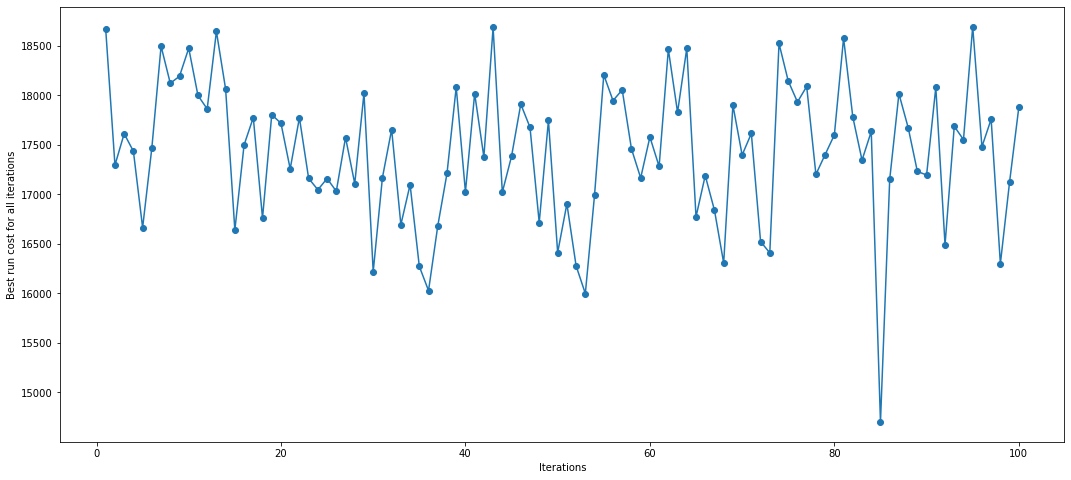

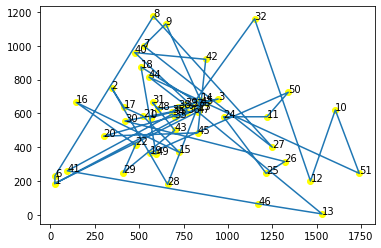

In [3]:
run = 1
best_cost_per_run = []
best_route_per_run = []
bestcost_of_all_runs = []
best_routeof_allruns = []
all_runs_iterations_route = []
all_runs_iterations_cost = []
niter = 100
z = list(range(1,niter+1))

print('Route and costs for all 10 runs:')
while run < 11:
    print('Best route and Cost for Run:', run)
    
    route, cost = ant_colony(niter)
    best_index = np.argmin(cost)
    print(route[best_index], cost[best_index])
#     print('Best Cost for Run', run, ':', cost[best_index])
    bestcost_of_all_runs.append(cost[best_index])
    best_routeof_allruns.append(route[best_index])
    all_runs_iterations_route.append(route)
    all_runs_iterations_cost.append(cost)
    
    print()
    run = run + 1

#print Best cost of all runs
best_index_allruns = np.argmin(bestcost_of_all_runs)
print('Best route taken by an ant across all runs', best_routeof_allruns[best_index_allruns])
print('Best cost among all runs',bestcost_of_all_runs[best_index_allruns])
# print('Best cost by argminimum among all runs',min(bestcost_of_all_runs))
print('Mean of all the best costs in all runs', np.mean(bestcost_of_all_runs))
print('Standard Deviation of all the best costs in all runs', np.std(bestcost_of_all_runs))


#Plot of iterations against best cost
plt.figure(figsize=(18, 8))
plt.plot(z, all_runs_iterations_cost[best_index_allruns], marker="o")
plt.xlabel("Iterations")
plt.ylabel("Best run cost for all iterations")
# plt.scatter(x_coor, y_coor)
plt.show()




#plotting the best optimum route across all runs
file = open("C:\\Users\\Vivek W\\Documents\\Heuristic optimization\\Homework 3\\My code\\ACO\\Berlin52.txt", "r")
# print(file.readlines())
# content_list = content.split(",")

x_coor =np.zeros((1, 52))
y_coor =np.zeros((1, 52))
x = []
y = []

for line in file:
    row = line.split()
    row[1] = float(row[1])
    row[2] = float(row[2])
    x.append(row[1])  #stored coordinates separately in x and y
    y.append(row[2])

x_coor = np.array(x)
y_coor = np.array(y)
temp=best_routeof_allruns[best_index_allruns]
# print(temp.shape)
# print(temp)
# plt.figure(figsize=(18, 8))

x_seq=[]
y_seq=[]
for i in temp:
    i=int(i)
    x_seq.append(x_coor[i])
    y_seq.append(y_coor[i])
fig, ax = plt.subplots()
ax.scatter(x_coor, y_coor, color = "yellow")
numbers = list(range(0,52))
for i, txt in enumerate(numbers):
    ax.annotate(txt, (x_coor[i],y_coor[i]))
plt.plot(x_seq,y_seq)



In [4]:
print(best_routeof_allruns[best_index_allruns])

[ 0.  5.  1.  6.  8. 27.  7.  9. 14. 28.  2. 17. 21. 15. 16. 22. 29. 43.
 31. 48.  3.  4. 18. 49. 19. 50. 11. 24. 25. 26. 30. 35. 38. 36. 39. 44.
 51. 10. 12. 32. 37. 40. 42. 45. 20. 23. 33. 34. 41. 46. 13. 47.  1.]


Best Global optimum route: [ 0. 48. 31. 44. 18. 40.  7.  8.  9. 42. 32. 50. 10. 51. 13. 12. 46. 25.
 26. 27. 11. 24.  3.  5. 14.  4. 23. 47. 37. 36. 39. 38. 35. 34. 33. 43.
 45. 15. 28. 49. 19. 22. 29.  1.  6. 41. 20. 16.  2. 17. 30. 21.]
Plot of the known Global Optimum route as given in file Berlin52_optimum.txt


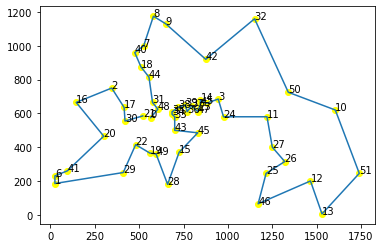

In [5]:
#plotting the known global optimum route as given in file Berlin52_optimum.txt
file2 = open("C:\\Users\\Vivek W\\Documents\\Heuristic optimization\\Homework 3\\My code\\ACO\\Berlin52_optimum.txt", "r")
xpath_optimum = np.zeros((1, 52))
xpath = []
for line in file2:
    rows = line.split()
#     print(rows)
    rows[0] = float(rows[0])
    xpath.append(rows[0])  #stored path in xpath
#     print(xpath)
xpath_optimum = np.array(xpath)
print('Best Global optimum route:',xpath_optimum)

tempo = xpath_optimum
x_seq2=[]
y_seq2=[]
for t in tempo:
#     print(t)
    t=int(t)
    x_seq2.append(x_coor[t])
#     print('x_seq2',x_seq2)
    y_seq2.append(y_coor[t])
fig, ax = plt.subplots()
ax.scatter(x_coor, y_coor, color = "yellow")
numbers2 = list(range(0,52))
for v, txt in enumerate(numbers2):
    ax.annotate(txt, (x_coor[v],y_coor[v]))
print('Plot of the known Global Optimum route as given in file Berlin52_optimum.txt')
plt.plot(x_seq2,y_seq2)
